## Relax Data Challenge

In [1]:
# Import relevant packages
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats
import os
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split

#### Data Loading and Cleaning

In [2]:
# Get directory for data location and load using read_csv
path = '/Users/student/Desktop/SpringboardDSCareerTrack/relax_challenge'
os.chdir(path)
engagement_df = pd.read_csv('takehome_user_engagement.csv')
user_df = pd.read_csv('takehome_users.csv', encoding = 'ISO-8859-1')

Check for and deal with missing values for engagement_df dataset.

In [3]:
# View first few rows of user engagement dataset
engagement_df.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [4]:
# Check for any null-entries and dtypes for engagement_df features
engagement_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [5]:
# Change the time_stamp feature as a datetime object
engagement_df['time_stamp'] = pd.to_datetime(engagement_df['time_stamp'])
# engagement_df.sort_values(by='time_stamp', inplace=True)
engagement_df.set_index('time_stamp', inplace=True)
engagement_df.head()

,user_id,visited
time_stamp,,
2014-04-22 03:53:30,1,1
2013-11-15 03:45:04,2,1
2013-11-29 03:45:04,2,1
2013-12-09 03:45:04,2,1
2013-12-25 03:45:04,2,1


In [6]:
# This for loop will determine which users to define as adopted. To be considered adopted, 
# the user must use the product at least three times in one week. Fill the list atLeast3 with
# 1 if there is at least one instance where user logs in 3 times or more in one week, and 0
# if not.

atLeast3 = []
for user_id in list(user_df['object_id'].unique()):
    ID_logins = engagement_df[engagement_df['user_id'] == user_id]
    weekly_login = ID_logins.visited.resample('7d').sum()
    if any(y >= 3 for y in weekly_login):
    #if weekly_login.loc[weekly_login >= 3].shape[0] > 0:
        atLeast3.append(1)
    else: 
        atLeast3.append(0)

In [7]:
# Assign the atLeast3 binary values to a new 'adopted' feature for user_df. This will be our
# predictor variable.
user_df['adopted'] = atLeast3

Check for and deal with missing values for user_df dataset.

In [8]:
# View first few rows of user information dataset
user_df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0


In [9]:
# Check for any null-entries and dtypes for user_df features
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
 10  adopted                     12000 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 1.0+ MB


In [10]:
# Check the unique value counts for each features
for col in user_df.columns:
    print('There are', len(user_df[col].unique()), 'unique values for', col, ':' , user_df[col].unique())
    print('\n')

There are 12000 unique values for object_id : [    1     2     3 ... 11998 11999 12000]


There are 11996 unique values for creation_time : ['2014-04-22 03:53:30' '2013-11-15 03:45:04' '2013-03-19 23:14:52' ...
 '2014-04-27 12:45:16' '2012-05-31 11:55:59' '2014-01-26 08:57:12']


There are 11355 unique values for name : ['Clausen August' 'Poole Matthew' 'Bottrill Mitchell' ... 'Haynes Jake'
 'Faber Annett' 'Lima Thaís']


There are 11980 unique values for email : ['AugustCClausen@yahoo.com' 'MatthewPoole@gustr.com'
 'MitchellBottrill@gustr.com' ... 'JakeHaynes@cuvox.de'
 'mhaerzxp@iuxiw.com' 'ThaisMeloLima@hotmail.com']


There are 5 unique values for creation_source : ['GUEST_INVITE' 'ORG_INVITE' 'SIGNUP' 'PERSONAL_PROJECTS'
 'SIGNUP_GOOGLE_AUTH']


There are 8822 unique values for last_session_creation_time : [1.39813881e+09 1.39623750e+09 1.36373489e+09 ... 1.39860272e+09
 1.33863816e+09 1.39072663e+09]


There are 2 unique values for opted_in_to_mailing_list : [1 0]


There are 2 u

We see that the unique count for 'user_id' in the user engagement dataframe equals the nonnull entries for 'last_session_creation_time' in the user information dataframe. Verify the sets of the user ids are the same.  

In [11]:
# Verify the set of user ids for the two dataframes are same.
set(user_df.loc[user_df['last_session_creation_time'].isnull()==False, 'object_id']) == set(engagement_df['user_id'])

True

In [12]:
# Remove the following features.
user_df.drop(['name', 'email','creation_time','last_session_creation_time', 'invited_by_user_id'], axis = 1,inplace=True)

In [13]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   object_id                   12000 non-null  int64 
 1   creation_source             12000 non-null  object
 2   opted_in_to_mailing_list    12000 non-null  int64 
 3   enabled_for_marketing_drip  12000 non-null  int64 
 4   org_id                      12000 non-null  int64 
 5   adopted                     12000 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 562.6+ KB


#### Visualization

Here we plot barplots for the independent categorical features of our dataset. Note that while 'org_id' is a categorical feature, we plot as a histogram as there are too many unique features to plot into a barplots.

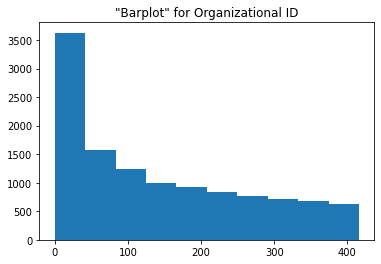

In [14]:
# "Barplot" for org_id
plt.hist(user_df['org_id'])
plt.title('"Barplot" for Organizational ID')
plt.show()

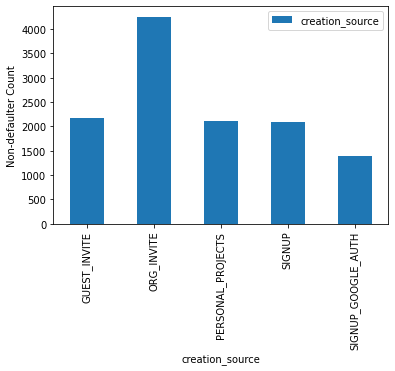

In [15]:
# Barplot for creation_source
ax = user_df.groupby(['creation_source'])[['creation_source']].count().plot(kind='bar').set_ylabel('Non-defaulter Count')

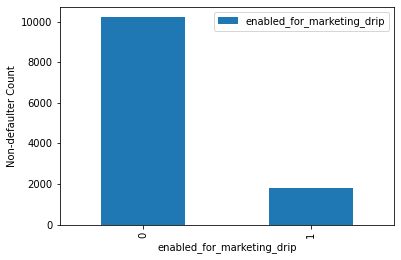

In [16]:
# Barplot for 'enabled_for_marketing_drip'
ax = user_df.groupby(['enabled_for_marketing_drip'])[['enabled_for_marketing_drip']].count().plot(kind='bar').set_ylabel('Non-defaulter Count')

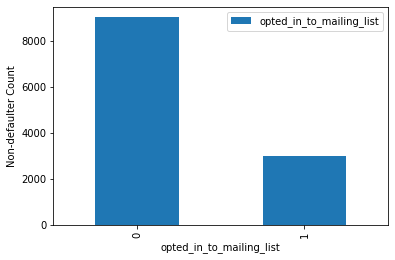

In [17]:
# Barplot for 'opted_in_to_mailing_list'
ax = user_df.groupby(['opted_in_to_mailing_list'])[['opted_in_to_mailing_list']].count().plot(kind='bar').set_ylabel('Non-defaulter Count')

#### Preprocessing and Modeling

In [18]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   object_id                   12000 non-null  int64 
 1   creation_source             12000 non-null  object
 2   opted_in_to_mailing_list    12000 non-null  int64 
 3   enabled_for_marketing_drip  12000 non-null  int64 
 4   org_id                      12000 non-null  int64 
 5   adopted                     12000 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 562.6+ KB


In [19]:
# Create dummy variables for 'creation_source'
user_df = pd.get_dummies(user_df, columns=['creation_source'])

#### Model

In [20]:
# Separate independent from predictor feature(s)
X = user_df.drop(['adopted'], axis=1)
y = user_df['adopted']   # this is our predictor variable

# Use SMOTE to balance the binary predictor classes
from imblearn.over_sampling import SMOTE
X_smote, y_smote = SMOTE().fit_sample(X, y.values.ravel())

# Use train_test_split to split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_smote,y_smote,test_size=0.2,random_state=26)

In [21]:
# Data standardization: X_train_stand, X_test_stand
X_train_stand = X_train.copy() 
X_test_stand = X_test.copy()

for i in X_train.columns:
    
    # fit on training data column
    scale = StandardScaler().fit(X_train_stand[[i]])
    
    # transform the training data column
    X_train_stand[i] = scale.transform(X_train_stand[[i]])
    
    # transform testing data column
    X_test_stand[i] = scale.transform(X_test_stand[[i]])

In [22]:
# Import modeing packages
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_curve
import sklearn.metrics

In [23]:
# Grid search parameters
param_dict = {
    'criterion':['gini', 'entropy'],
    'max_depth':range(1,4), 
    'class_weight': ['balanced', None], 
    'n_estimators': [10, 25, 50, 100]
}

# import RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=1234)

# Perform GridSearchCV
grid = GridSearchCV(rf, param_grid=param_dict, cv=5,verbose=1,n_jobs=-1,
                     scoring='roc_auc')
grid.fit(X_train_stand, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1234),
             n_jobs=-1,
             param_grid={'class_weight': ['balanced', None],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 4),
                         'n_estimators': [10, 25, 50, 100]},
             scoring='roc_auc', verbose=1)

In [24]:
# See the best parameters
grid.best_params_

{'class_weight': None, 'criterion': 'gini', 'max_depth': 3, 'n_estimators': 25}

In [28]:
# Build the model off of the best parameters
model = RandomForestClassifier(random_state=1234, max_depth = 3, class_weight='balanced', 
                                   criterion= 'gini', n_estimators=25)
model.fit(X_train_stand, y_train)
y_pred = model.predict(X_test_stand)

# Obtain the accuracy score, f1 score confusion matrix and roc score: ac, f1, cm, roc
ac = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
roc = roc_auc_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

# print results
print('Random Forest: Accuracy=%.3f' % (ac))
print('Random Forest: f1-score=%.3f' % (f1))
print('Random Forest: Roc_auc=%.3f' % (roc))
print(sklearn.metrics.classification_report(y_test, y_pred))

Random Forest: Accuracy=0.778
Random Forest: f1-score=0.778
Random Forest: Roc_auc=0.778
              precision    recall  f1-score   support

           0       0.76      0.81      0.79      2113
           1       0.80      0.75      0.77      2099

    accuracy                           0.78      4212
   macro avg       0.78      0.78      0.78      4212
weighted avg       0.78      0.78      0.78      4212



In [29]:
# The function will plot the ROC curve
def plot_roc_curve(fper, tper):  
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

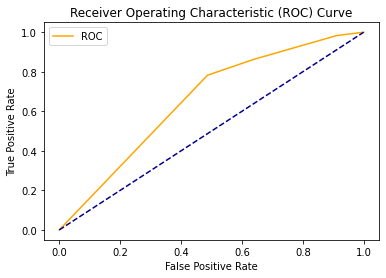

In [30]:
# Obtain relevant data for the roc curve plot and plot
probs = model.predict_proba(X_test)  
probs = probs[:, 1]  
fper, tper, thresholds = roc_curve(y_test, probs) 
plot_roc_curve(fper, tper)